# Librarys

In [1]:
import numpy as np #for number array and rgb image pixel values and feautres
#to buid a dataframe for confusion matrix
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline
import os
import cv2
#to use tools needed for deep learning
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(2)
#to generate random numbers
import random 
#fro models evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
#RandomForest sklearn implementation
from sklearn.ensemble import RandomForestClassifier
from skimage import io as ioski
from skimage.color import rgb2gray
from skimage.transform import rotate, resize
import io
from PIL import Image

# Data preprocessing

In [10]:
data_path='C:/Users/poste/Desktop/MIAAD-S2/Projet1/tifinagh/Dataset/AMHCD_64/AMHCD_64/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'ya': 0, 'yab': 1, 'yach': 2, 'yad': 3, 'yadd': 4, 'yae': 5, 'yaf': 6, 'yag': 7, 'yagh': 8, 'yagw': 9, 'yah': 10, 'yahh': 11, 'yaj': 12, 'yak': 13, 'yakw': 14, 'yal': 15, 'yam': 16, 'yan': 17, 'yaq': 18, 'yar': 19, 'yarr': 20, 'yas': 21, 'yass': 22, 'yat': 23, 'yatt': 24, 'yaw': 25, 'yax': 26, 'yay': 27, 'yaz': 28, 'yazz': 29, 'yey': 30, 'yi': 31, 'yu': 32}
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


## Coverting images into gray scale and resizing gray scale

In [9]:
img_size=64
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
            #Coverting the image into gray scale
            resized=cv2.resize(thresh ,(img_size,img_size))
            #resizing the gray scale into 64x64, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

### Save Dataset as table numpy

In [7]:
len(data)
data=np.array(data)
with open('data.npy', 'wb') as f:
    np.save(f, data)

In [8]:
len(target)
target=np.array(target)
with open('target.npy', 'wb') as f:
    np.save(f, target)

### Load Dataset

In [10]:
with open('data.npy', 'rb') as f:
    data = np.load(f)

In [11]:
with open('target.npy', 'rb') as f:
    target = np.load(f)

## Categorical variables encoding and vizualization

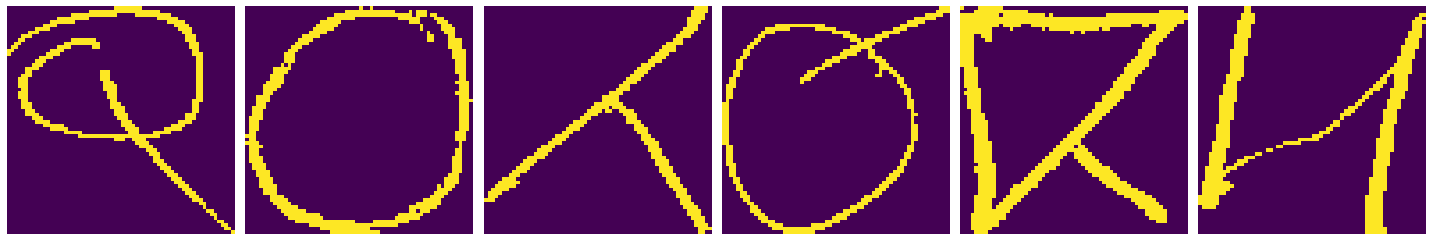

In [12]:
#target=np.array(target)
from keras.utils import np_utils
target=np_utils.to_categorical(target)
#data=np.array(data)
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
imgs=[]
for index in range(6):
    imgs.append(data[random.randint(0,data.shape[0])])  
plotImages(imgs)

In [13]:
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)
print(target.shape)

(25740, 64, 64, 1)
(25740, 33)


## Image normalization

In [14]:
data=np.array(data)/255.0

# Split images into train and test sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

# Create CNN model

In [16]:
# 1. Convolution
# 2. Activation
# 3. Polling
# 4. fully connected network
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Fully connected layer
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(33))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                        

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
checkpoint = ModelCheckpoint('modeltifinagh-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')
history=model.fit(X_train, y_train,epochs=30,callbacks=[checkpoint],verbose=1,validation_split=0.2)

Epoch 1/30
432/432 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.9006

INFO:tensorflow:Assets written to: modeltifinagh-001.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-001.model\assets


432/432 [==============================] - 187s 426ms/step - loss: 0.3537 - accuracy: 0.9006 - val_loss: 0.0907 - val_accuracy: 0.9730
Epoch 2/30
432/432 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9777

INFO:tensorflow:Assets written to: modeltifinagh-002.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-002.model\assets


432/432 [==============================] - 166s 385ms/step - loss: 0.0672 - accuracy: 0.9777 - val_loss: 0.0885 - val_accuracy: 0.9751
Epoch 3/30
432/432 [==============================] - 162s 375ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.1037 - val_accuracy: 0.9765
Epoch 4/30
432/432 [==============================] - 161s 373ms/step - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.1179 - val_accuracy: 0.9713
Epoch 5/30
432/432 [==============================] - 161s 374ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.1167 - val_accuracy: 0.9739
Epoch 6/30
432/432 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9941

INFO:tensorflow:Assets written to: modeltifinagh-006.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-006.model\assets


432/432 [==============================] - 164s 379ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0827 - val_accuracy: 0.9817
Epoch 7/30
432/432 [==============================] - 161s 373ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0999 - val_accuracy: 0.9774
Epoch 8/30
432/432 [==============================] - 163s 377ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.1045 - val_accuracy: 0.9794
Epoch 9/30
432/432 [==============================] - 164s 379ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0997 - val_accuracy: 0.9788
Epoch 10/30
432/432 [==============================] - 162s 375ms/step - loss: 0.0140 - accuracy: 0.9961 - val_loss: 0.0909 - val_accuracy: 0.9803
Epoch 11/30
432/432 [==============================] - 163s 377ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0846 - val_accuracy: 0.9835
Epoch 12/30
432/432 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9959

INFO:tensorflow:Assets written to: modeltifinagh-012.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-012.model\assets


432/432 [==============================] - 170s 393ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0694 - val_accuracy: 0.9875
Epoch 13/30
432/432 [==============================] - 170s 394ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0817 - val_accuracy: 0.9829
Epoch 14/30
432/432 [==============================] - 164s 380ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0846 - val_accuracy: 0.9823
Epoch 15/30
432/432 [==============================] - 162s 376ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0718 - val_accuracy: 0.9846
Epoch 16/30
432/432 [==============================] - 162s 374ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.1432 - val_accuracy: 0.9742
Epoch 17/30
432/432 [==============================] - 160s 371ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0951 - val_accuracy: 0.9812
Epoch 18/30
432/432 [==============================] - 161s 372ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.1247 - val_

# Visulization of Accuracy and Loss in Training and  Validation sets

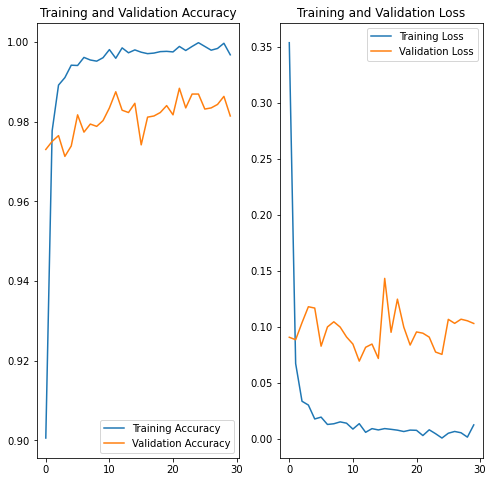

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluation of CNN model

In [19]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

266/266 [==============================] - 19s 71ms/step - loss: 0.1159 - accuracy: 0.9823
Test accuracy:  0.982342541217804


In [20]:
y_pred=np.argmax(model.predict(X_test),axis=1)
y_test=np.argmax(y_test,axis=1)
print(classification_report(y_pred,y_test))

266/266 [==============================] - 20s 72ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       0.98      0.99      0.99       241
           2       1.00      1.00      1.00       251
           3       1.00      0.97      0.98       277
           4       0.99      0.99      0.99       272
           5       0.99      1.00      0.99       261
           6       0.98      1.00      0.99       247
           7       0.99      0.97      0.98       253
           8       0.98      0.99      0.98       272
           9       1.00      0.98      0.99       245
          10       0.99      0.99      0.99       275
          11       0.98      0.98      0.98       257
          12       0.98      0.98      0.98       275
          13       0.98      0.98      0.98       248
          14       0.97      1.00      0.99       233
          15       0.99      0.97      0.98       271
          16       0.98 

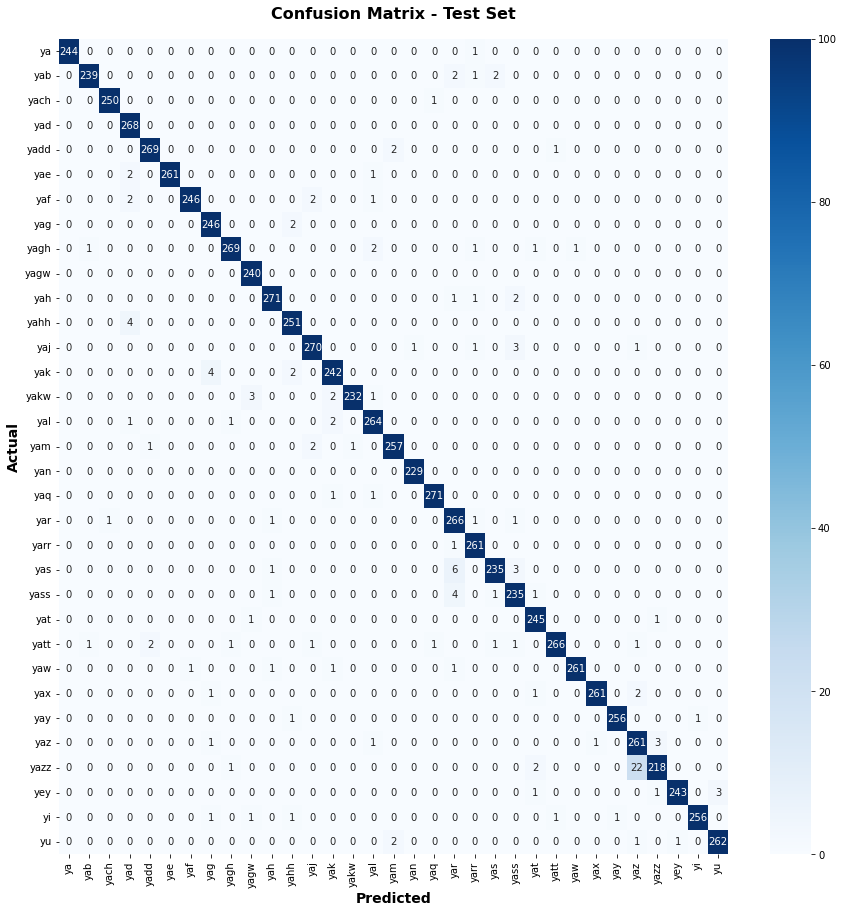

In [21]:
CMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=categories, index =categories)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 100,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')    
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

### Save model

In [22]:
model.save('model.h5')

### Load model

In [2]:
model = load_model("model.h5")

### Segmentation : lines, words, characters

In [123]:
def thresholding(image,vall,img):
    
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,120,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,vall), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 2)
    (contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)
    img2 = img.copy()
    line_list = []

    for ctr in sorted_contours_lines:
        x,y,w,h = cv2.boundingRect(ctr)
        cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
        line_list.append([x, y, x+w, y+h])
    
    return line_list

In [141]:
def alphabet_recognize(filepath):
    image = filepath
    blur_image=cv2.medianBlur(filepath,7)
    #plt.imshow(image)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(grey ,135,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((3,5), np.uint8)
    dilated3 = cv2.dilate(thresh, kernel, iterations = 1)
    
    contours,hierarchy= cv2.findContours(dilated3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    preprocessed_digits = []

    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    if contours and boundingBoxes:
        (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][0], reverse=False))

    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (64,64))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    img_size = 64
    alphabets=[]
    for digit in preprocessed_digits:
        resized = cv2.resize(digit, (img_size, img_size))
        normalized = resized / 255.0 
        input_data = np.reshape(normalized, (1, img_size, img_size, 1))
        prediction = model.predict(input_data)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = amazigh_alpha[predicted_class_index]
        alphabets.append(predicted_class_label)
    recognized_alphabets = ''.join(alphabets)
    #print(recognized_alphabets)
    return recognized_alphabets
    

In [103]:
def amine(path):    
    image = cv2.imread(path)
    img = cv2.imread(path)
    plt.imshow(image);
    #Line
    text = []
    lines = thresholding(image,400,image)
    for i,y in enumerate(lines):
        trtr = lines[i]
        roi_8=img[trtr[1]:trtr[3], trtr[0]:trtr[2]]
        #Word
        words = thresholding(roi_8,20,roi_8)
        index = len(words) - 1
        for w,u in enumerate(words):
            trtrr = words[index]
            index -= 1
            roi_9=roi_8[trtrr[1]:trtrr[3], trtrr[0]:trtrr[2]]
            word = alphabet_recognize(roi_9)
            #word = word + " "
            text.append(word)
            text.append(" ")
        text.append("/n")
    return text

In [5]:
def my_text(path):
    my_text = amine(path)
    for t in my_text:
        if t == "/n":
            print()
        else:
            print(t, end="")

In [ ]:
amazigh_alpha = ['ⴰ', 'ⴱ', 'ⵛ', 'ⴷ', 'ⴹ', 'ⵄ', 'ⴼ', 'ⴳ', 'ⵖ', 'ⴳⵯ', 'ⵀ', 'ⵃ', 'ⵊ', 'ⴽ', 'ⴽⵯ',
                'ⵍ','ⵎ','ⵏ', 'ⵇ', 'ⵔ', 'ⵕ', 'ⵙ', 'ⵚ', 'ⵜ', 'ⵟ', 'ⵡ', 'ⵅ', 'ⵢ', 'ⵣ','ⵥ', 'ⴻ', 'ⵉ', 'ⵓ']
my_list = []
for i in range(len(amazigh_alpha)):
    my_list.append({amazigh_alpha[i]: categories[i]})
print(my_list)

1/1 [==============================] - 0s 28ms/step
ⵎⵔⴳⵜⵔⵙ 


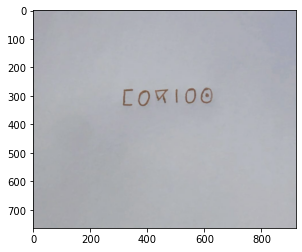

In [148]:
my_text('td.jpeg')

1/1 [==============================] - 0s 33ms/step
ⵍⵔⵄⵉⵡⵜ ⴱⵓⵊⵡⵔ 


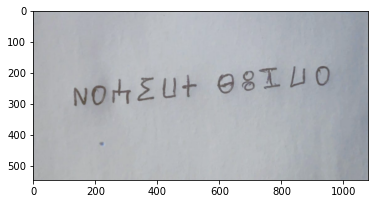

In [145]:
my_text('tifinagh.jpeg')

### Test

[{'ⴰ': 'ya'}, {'ⴱ': 'yab'}, {'ⵛ': 'yach'}, {'ⴷ': 'yad'}, {'ⴹ': 'yadd'}, {'ⵄ': 'yae'}, {'ⴼ': 'yaf'}, {'ⴳ': 'yag'}, {'ⵖ': 'yagh'}, {'ⴳⵯ': 'yagw'}, {'ⵀ': 'yah'}, {'ⵃ': 'yahh'}, {'ⵊ': 'yaj'}, {'ⴽ': 'yak'}, {'ⴽⵯ': 'yakw'}, {'ⵍ': 'yal'}, {'ⵎ': 'yam'}, {'ⵏ': 'yan'}, {'ⵇ': 'yaq'}, {'ⵔ': 'yar'}, {'ⵕ': 'yarr'}, {'ⵙ': 'yas'}, {'ⵚ': 'yass'}, {'ⵜ': 'yat'}, {'ⵟ': 'yatt'}, {'ⵡ': 'yaw'}, {'ⵅ': 'yax'}, {'ⵢ': 'yay'}, {'ⵣ': 'yaz'}, {'ⵥ': 'yazz'}, {'ⴻ': 'yey'}, {'ⵉ': 'yi'}, {'ⵓ': 'yu'}]


1/1 [==============================] - 0s 55ms/step
ⵢ


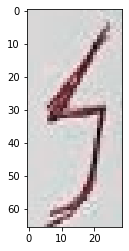

In [51]:
prediction = model.predict(input_data)
predicted_class_index = np.argmax(prediction)
predicted_class_label = amazigh_alpha[predicted_class_index]
print(predicted_class_label)
plt.imshow(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


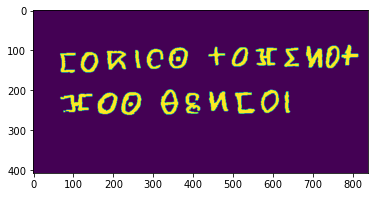

In [132]:
image = cv2.imread('tpp.jpeg')

grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(grey ,130,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((3,5), np.uint8)
dilated3 = cv2.dilate(thresh, kernel, iterations = 1)
print(dilated3)
plt.imshow(dilated3)

In [ ]:
import argparse
import cv2 as cv
from collections import Counter

def deskew(image ,show_images=False):
    # function takes in skewed line image and return deskewed image line 
    
    img = image.copy()

    # first step is to detect edges in the rgb image then create lines 

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray,50,150,apertureSize = 3)
    # detecting lines through HLP algorithm 
    
    lines = cv.HoughLinesP(edges,10,np.pi/180,100,minLineLength=50,maxLineGap=50)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        
    # second step clustering lines with the same slope together 
        
    def true_line_slope(lines):
        # this function clusters the slopes together then identifies the cluster of the hieghet number of lines

        slopes = [(l[0][3]-l[0][1])/(l[0][2]-l[0][0])for l in lines if l[0][0]!=l[0][2]]

        rounded = [round(k,2) for k in slopes]

        h = Counter(rounded)

        return max(h, key=h.get)
    
    sl=true_line_slope(lines)
    
    #third step detect skew angle
    
    angle = (np.rad2deg(np.arctan(sl)))
    
    # forth step deskew image with the skew angle value
    
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv.warpAffine(image, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)
    if show_images==True:
        plt.imshow(image)
        plt.figure()
        plt.imshow(rotated) 
        
    return rotated

In [ ]:
# correction of the very thin fonts
def thick_font(image):
    import numpy as np
    image = cv.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    image = cv.bitwise_not(image)
    return (image)

In [ ]:
# remove noisy dots if found
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations=1)
    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    image = cv.medianBlur(image, 3)
    return (image)